# booking status estimation by using MultinomialNB

# data analysis

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [4]:
df["booking_status"].nunique()

2

In [5]:
df.corr(numeric_only=True)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,1.000000,0.006210,0.001231,-0.002004,-0.000970,0.001623,0.004551,0.004952,-0.003176,-0.004313,0.005980,-0.007283,0.005699,0.002871,0.008362,0.001026,0.002944,-0.000743,0.007264
no_of_adults,0.006210,1.000000,-0.031669,0.071417,0.082347,-0.038004,-0.014628,0.160038,0.085969,0.111617,0.018059,0.030865,-0.019303,-0.249581,-0.068073,-0.152986,0.320082,0.185158,0.079760
no_of_children,0.001231,-0.031669,1.000000,-0.018453,-0.044519,-0.066252,0.026916,0.446015,-0.151382,0.043867,-0.018420,0.026428,0.131166,-0.047146,-0.014755,-0.027848,0.370766,0.164969,0.004260
no_of_weekend_nights,-0.002004,0.071417,-0.018453,1.000000,0.188200,-0.025613,-0.037671,-0.010716,0.076146,0.043962,-0.024495,0.024276,-0.013913,-0.082078,-0.031709,-0.039084,-0.041083,0.026503,0.044279
no_of_week_nights,-0.000970,0.082347,-0.044519,0.188200,1.000000,-0.072577,-0.060155,-0.001363,0.091935,0.054174,0.022302,-0.018058,-0.011606,-0.132183,-0.036995,-0.068045,-0.000323,0.032639,0.058506
type_of_meal_plan,0.001623,-0.038004,-0.066252,-0.025613,-0.072577,1.000000,-0.016814,-0.139149,0.087172,-0.100922,0.010629,-0.011635,-0.092322,-0.059776,-0.012222,-0.039064,0.015905,-0.056030,0.045980
required_car_parking_space,0.004551,-0.014628,0.026916,-0.037671,-0.060155,-0.016814,1.000000,0.036742,-0.084330,0.017161,-0.017495,-0.006198,0.121791,0.163659,0.023254,0.082706,0.054392,0.083465,-0.093262
room_type_reserved,0.004952,0.160038,0.446015,-0.010716,-0.001363,-0.139149,0.036742,1.000000,-0.224454,0.054004,-0.016770,0.024594,0.258695,-0.038326,-0.010333,-0.016110,0.423991,0.162649,-0.023087
lead_time,-0.003176,0.085969,-0.151382,0.076146,0.091935,0.087172,-0.084330,-0.224454,1.000000,0.182180,0.133341,0.008967,-0.073728,-0.201637,-0.066618,-0.120447,-0.107403,-0.035659,0.374865
arrival_year,-0.004313,0.111617,0.043867,0.043962,0.054174,-0.100922,0.017161,0.054004,0.182180,1.000000,-0.311024,0.006512,0.156204,-0.031529,-0.004307,0.014911,0.232151,0.098462,0.178326


In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

<Axes: >

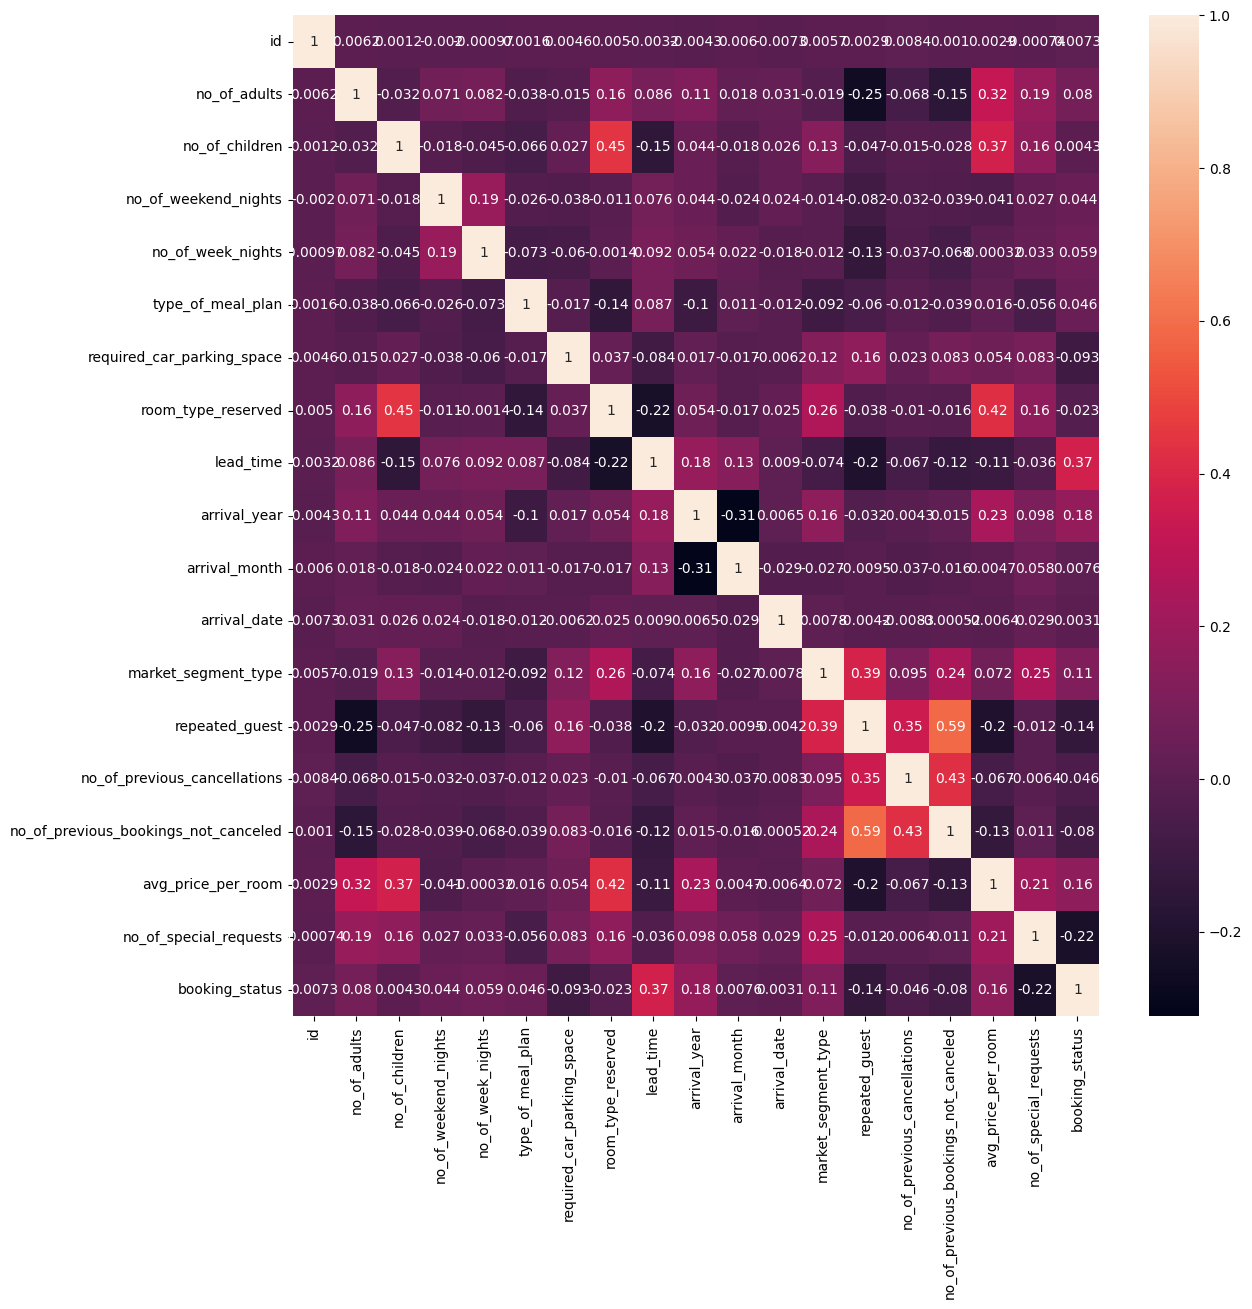

In [8]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [9]:
l=[]
for i in df.corr(numeric_only=True):
    if -0.04<df.corr(numeric_only=True)[i][18]<0.04:
        l.append(i)






df=df.drop(l,axis=1)

C:\Users\yso05\AppData\Local\Temp\ipykernel_20404\242596400.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if -0.04<df.corr(numeric_only=True)[i][18]<0.04:


In [10]:
df.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,0,9,2018,1,1,11,0,67.50,0,0
1,2,1,2,0,0,117,2018,0,0,0,0,72.25,0,0
2,2,0,1,0,0,315,2018,0,0,0,0,52.00,0,0
3,1,0,2,1,0,32,2018,1,0,0,0,56.00,0,0
4,2,1,0,0,0,258,2018,0,0,0,0,100.00,0,1


In [11]:
df.isnull().sum()

no_of_adults                            0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df1=pd.read_csv("test.csv")

In [13]:
l=[]
for i in df1.columns:
    if i not in df.columns:
        l.append(i)



df1=df1.drop(l,axis=1)        

In [14]:
df1.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,1,4,0,0,111,2018,1,0,0,0,115.60,2
1,2,0,3,0,0,22,2017,0,0,0,0,85.00,0
2,2,0,1,0,0,18,2018,1,0,0,0,240.00,1
3,2,0,3,0,0,88,2018,0,0,0,0,80.75,0
4,1,0,2,2,0,7,2018,1,0,0,0,144.00,0


# model training part

In [15]:
from sklearn.naive_bayes import MultinomialNB


In [16]:
mb=MultinomialNB()

In [17]:
x=df.drop("booking_status",axis=1)

In [18]:
y=df["booking_status"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [21]:
model=mb.fit(x,y)

In [22]:
model1=mb.fit(x_train,y_train)
pred=model1.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(pred,y_test)

0.6846793349168646

# we estimated by .68

In [25]:
pre=model.predict(df1)

In [26]:
df2=pd.read_csv("test.csv")

In [27]:
df2["booking_status"]=pre

In [28]:
df2.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,1
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,0
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0,0


In [29]:
df2=df2.drop(['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space',
'room_type_reserved',
'lead_time',
'arrival_year',
'arrival_month',
'arrival_date','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests'],axis=1)

In [30]:
df2.to_csv('data.csv', index=False)